# Table of Contents
 <p><div class="lev2 toc-item"><a href="#tasks-to-do" data-toc-modified-id="tasks-to-do-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>tasks to do</a></div><div class="lev2 toc-item"><a href="#mnist.yml" data-toc-modified-id="mnist.yml-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>mnist.yml</a></div><div class="lev2 toc-item"><a href="#mnist_defaults.yml" data-toc-modified-id="mnist_defaults.yml-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>mnist_defaults.yml</a></div><div class="lev2 toc-item"><a href="#Create-checksum-for-dataset" data-toc-modified-id="Create-checksum-for-dataset-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Create checksum for dataset</a></div><div class="lev2 toc-item"><a href="#Make-a-third-mnist.yml-to-include" data-toc-modified-id="Make-a-third-mnist.yml-to-include-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Make a third mnist.yml to include</a></div><div class="lev2 toc-item"><a href="#Train-2-epochs-to-see-how-weights-are-saved" data-toc-modified-id="Train-2-epochs-to-see-how-weights-are-saved-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Train 2 epochs to see how weights are saved</a></div><div class="lev2 toc-item"><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-07"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Model evaluation</a></div><div class="lev2 toc-item"><a href="#Test-model-and-save-result" data-toc-modified-id="Test-model-and-save-result-08"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Test model and save result</a></div><div class="lev2 toc-item"><a href="#Plot-loss" data-toc-modified-id="Plot-loss-09"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Plot loss</a></div><div class="lev2 toc-item"><a href="#What-is-stored-inside-mnist-log/" data-toc-modified-id="What-is-stored-inside-mnist-log/-010"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>What is stored inside mnist-log/</a></div><div class="lev2 toc-item"><a href="#What-output_hook-produce?" data-toc-modified-id="What-output_hook-produce?-011"><span class="toc-item-num">0.11&nbsp;&nbsp;</span>What output_hook produce?</a></div><div class="lev2 toc-item"><a href="#Q&amp;A" data-toc-modified-id="Q&amp;A-012"><span class="toc-item-num">0.12&nbsp;&nbsp;</span>Q&amp;A</a></div>

## tasks to do
- as for previous question on [`sort_by`](https://hyp.is/We4nmgOREeebSI8y2vM0yQ/github.com/EmbraceLife/kur_doc_demos/blob/master/comm%20with%20adam.md) x
- a [updated question](https://hyp.is/JIAs4gOSEeetludP6WuU4Q/github.com/EmbraceLife/kur_doc_demos/blob/master/comm%20with%20adam.md) to previous question on use of `checkpoint`, 
- learn to write a [simple hook](https://hyp.is/CPUsdAOTEeeGx_-sW8Ruxw/github.com/EmbraceLife/kur_doc_demos/blob/master/comm%20with%20adam.md)
- learn to [create a image dataset](https://hyp.is/jtsMKAOTEeeFCXNxi-KATw/github.com/EmbraceLife/kur_doc_demos/blob/master/comm%20with%20adam.md) for pickle data supplier
- variablize folder name

## mnist.yml

In [36]:
%%writefile  t2/mnist.yml 

---


model:
                                
  - input: images                # build input layer, with name: images, images also is input_x

  - convolution:
      kernels: 64
      size: [2, 2]
  - activation: relu

  - convolution:
      kernels: 96
      size: [2, 2]                # QUESTION: as long as padding=same, convol images won't shrink? 
  - activation: relu
                                  # QUESTION: when pool shrink the image size, I don't need to track size here
  - pool: [3, 3]                  # add a pooling layer with shape 3x3

  - convolution:
      kernels: 96
      size: [2, 2]
  - activation: relu

  - flatten:
  - dense: [64, 10]

  - activation: softmax            # apply softmax activation to output layer
    name: labels                   # Question and Answer: make this layer to be output layer, name it `labels`
                                   # `name: labels` can be replaced with `- output: labels` 


include: mnist_defaults.yml  # to define default setting 
...

Writing t2/mnist.yml


## mnist_defaults.yml

In [49]:
%%writefile t2/mnist_defaults.yml

---
                         # Declare the loss function that is used during training/validation/testing.
loss:
                         # It is a list of loss functions, one for each model output.
                         # The MNIST example only has one output, named "labels".
  - target: labels
    name: categorical_crossentropy

                         # The "include" section in "mnist.yml" is magical, and will merge this section
                         # into the section in "mnist.yml".
                         ######## merge: this entire mnist-default.yml, not a few lines here? ##############
                    
                    
                                # See what included in train section: http://kur.deepgram.com/specification.html#train
train:
    
  data:  
    - mnist:                    # mnist is data supplier, with 2 parameters: images, and labels
        images:                 # dataset under variable name images, will be downloaded inside ~/kur
          url: "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
          checksum: 440fcabf73cc546fa21475e81ea370265605f56be210a4024d2ca8f203523609
          path: "~/kur/mnist"  # QUESTION!: mnist dataset will be downloaded to `~/kur`, regardless where I set the path?
                                # answer: it should be in new specified directory, but try it when ready
            
            
            
                                # QUESTION!: Is it possible to use mnist data supplier for other image datasets?
                                # for example, I have local files `images.gz` and `labels.gz` saved in ~/kur
                                # can I use mnist data supplier for my lcoal files? 
                                # how should I create `label.gz`?
                                # answer: store images and labels into a pickle file, but how?
                            
                                # QUESTION: STANDARD PACKAGE (http://kur.deepgram.com/specification.html#standard-packaging)
                                # `url`, `checksum`, `path` are universal to other data suppliers, but it up to other data
                                # suppliers to decide to utilize them or not, right?
                                # data suppliers: mnist, cifar, pickle, numpy_dict, csv, speech_recognition, are all different
            
                                # QUESTION: be cautious on file name, key name, input_layer name, output_layer name
                                # read (https://hyp.is/P5qm7ALoEeecumOcfUu09g/kur.deepgram.com/specification.html)
            
            
            
        labels:                 # dataset under variable name labels, will be downloaded inside ~/kur
          url: "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
          checksum: 3552534a0a558bbed6aed32b30c495cca23d567ec52cac8be1a0730e8010255c
          path: "~/kur/mnist"

            
                                 # how to use see (http://kur.deepgram.com/specification.html#provider)
                                 # As we discuss in "Examples" in the documentation, we only train on the first
                                 # batches each epoch. This is just to make getting through the MNIST example
                                 # nice and quick on slow/CPU-only machines. If you have a GPU, feel free to
                                 # remove the "provider:" section entirely.
                                
  provider:                      
    name: batch_provider         # if missing, then default is `name: batch_provider`, 
    batch_size: 10               # if missing, then `batch_size: 32` is default
    num_batches: 10              # if missing, use all batches, or set any number below max_num_batch
    randomize: true              # if missing, default is true, yes 
        
                                 # more parameters of `provider`: sortagrad, sort_by, shuffle_after, forced_batch_size
                                 # QUESTION!: on the use of `sort_by`
                                 # `sort_by: X` X must be input name or a column name? 
                                 # how and when do we need to use it other than speech example?



  weights: 
    initial:  "{{folder_name}}/best_w"
    last:  "{{folder_name}}/last_w"
        
        
  log:                           # QUESTION: see (http://kur.deepgram.com/specification.html#log)
    path:  "{{folder_name}}/mnist_log"              
                                 # if missing or `log: ` or `log: null`, then nothing is created or saved
                                 # there is more advanced way of using it
        
        
        
                                 # QUESTION: see (http://kur.deepgram.com/specification.html#epochs)
  epochs:                        # if missing, or `epochs: ` or `epochs: null` or `epochs: infinite`, 
                                 # then keep iterating until ctrl + c to stop
    number: 2                    # it can be empty, `null`, `infinite` or just a number
    mode: additional                  
                                 # 2 modes: default is `additional`, the other is `total` with log exist
                                 # mode: can not be empty, but can be missing
    
    
                                 # QUESTION: see (http://kur.deepgram.com/specification.html#optimizer)
                                 # we have options: adam, sgd, rsmprop, with clip 
  optimizer: 
    name: adam
    learning_rate: 0.001
    
    
                                # Attention: checkpoint (http://kur.deepgram.com/specification.html?highlight=sort_by#checkpoints)
                                # every 2 epochs, 5 batches 50 samples, or 30 minutes (`minutes: 30`), whichever is earlist, then
                                # it should pause training, save the weights (path: checkpoint.kur), 
                                # and run a validation run on 100 batches (validation: 100). You can also use `validation: yes` to 
                                # run validation on the entire validation set, 
                                # or `validation: ` no to only save the weights and then resume training.
                            
                                # given `validation: 100`, will the best weights wrt validation samples all the way up
                                # to the moment of checkpoint, be selected to save inside checkpoint.kur, instead of the latest 
                                # weights up to checkpoint? will each checkpoint be stored so there are many models saved in the end?
                                # or only the latest model will be stored?
                                
                                
                                # log: save the loss for each epoch, record history; 
                                # best_w: update the best weights wrt validation samples
                                # checkpoint.kur: save the latest weights wrt training set, at a specific time defined by checkpoint
                                
                                # QUESTION!:
                                # if I understand what stored inside `best_w` and `checkpoint.kur` correctly, in each epoch we have 
                                # the best weights wrt validation set saved in best_w, latest weights wrt training set 
                                # saved in last_w, why do we need checkpoint to save weights? or in what situation
                                # is checkpoint necessary?
                                
                                
  checkpoint:
    path:  "{{folder_name}}/checkpoint.kur"
    epochs: 2
    batches: 5
    samples: 50
    minutes: 30
    validation: 100                                
    
    
    
                                # how to make a plot
                                # QUESTION! Where does plot hooks belong? -- train section
  hooks:
    - plot:
        loss_per_batch:  "{{folder_name}}/loss1.png"
        loss_per_time:  "{{folder_name}}/loss2.png"
        throughput_per_time:  "{{folder_name}}/loss3.png"    
    

                         # Here, we use the MNIST test set as a validation set (more generally, you'll
                         # want train, validation, and test sets; but we ignore this for the MNIST
                         # example). The funky "&validation" is just a YAML anchor, so we can reference
                         # this section later.
validate: &validate
  data:
    - mnist:
        images:          #QUESTION AND ANSWER
                         # the checksum is optional. If you need to generate the checksum (because, for example, 
                         # you want to use a new/different dataset, same images and labels with different datasets for train/valid), 
                         # then just run sha256sum FILE (on Linux) or shasum -a 256 FILE (on macOS).
          url: "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
          checksum: 8d422c7b0a1c1c79245a5bcf07fe86e33eeafee792b84584aec276f5a2dbc4e6
          path: "~/kur/mnist"
        labels:
          url: "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
          checksum: f7ae60f92e00ec6debd23a6088c31dbd2371eca3ffa0defaefb259924204aec6
          path: "~/kur/mnist"

                         # Let's also use less data for validation, just to speed it along.
  provider:
    num_batches: 5
    batch_size: 8
    randomize: yes

        
                         # ATTENTION: where to save best validation weights see (http://kur.deepgram.com/specification.html#id1)
                         # Don't save if missing, or `weights: ` or `weights: null`
                         # save, with short form: `weights: path`
  weights: 
    best:  "{{folder_name}}/best_w"


                           # QUESTION!: how to make output hook useful in validate section?
                           # "If in validate section, the hooks are passed a single batch of model output after each validation run. 
                           # This is useful for printing out some examples of your model’s progress."
                           # does it mean: each epoch, a batch of model output will be generated; and it will be very helpful
                           # at end of each epoch, instead of loading from pickle file, such output is automatically printed out 
                           # in a nice readable format for users to see, right? Like we discussed previously about making 
                           # hooks for plotting weights and activations 
  hooks: 
    - output: 
        path:  "{{folder_name}}/valid_results.pkl"
        format: pickle  # we can have one format for output right?
        
                        # QUESTION: Don't we need separate dataset from training set and validation set?
                        # can Kur perform data split into training, validation and test sets?
        
        
        
        
                         # Let's define the test set, used if you execute something like:
                         # `kur test mnist.yml`
                         # The funky "*validation" is just a YAML alias, so we basically are setting the
                         # "test" section" to be the same as the "validate" section.
                         # this is why `validate: &validate` is very necessary and useful ##################
test: 
  <<: *validate

                         # This is the evaluation section, used during `kur evaluate mnist.yml`.
                         # The funky "<<: *validate" is just YAML, and basically means "copy all of the
                         # keys from 'validate', and then add/replace the 
                         # what does "copy all the keys from 'validate' mean? and "add/replace" what? ######
                         # but how exactly *validate and <<: *validate differ? #############################
           


  weights:               # best weights must set for test too, otherwise, meaningless
    initial:  "{{folder_name}}/best_w"
        
  provider: 
    num_batches: 30
                        
                        
                         # Use the entire testing set for evaluation, or set any number you like   
evaluate:
  <<: *validate
  


  provider:
    num_batches: null
        
        
  weights:               
    initial:  "{{folder_name}}/best_w"

        
                         # QUESTION!: with destination, this is to save/update an ouput whenever we run `kur evaluate file`, right?   
                         # (http://kur.deepgram.com/specification.html?highlight=sort_by#destination)
                    
                         # In this example: 
                         # entire test set is used to produce the output pickle file
                         # the pickle file contains 2 dicts, one for prediction labels, another for truth labels
  destination: "{{folder_name}}/mnist.results.pkl"

                         # This is a list of post-processing hooks. Here, we want to produce the
                         # digit-by-digit accuracy table (just called "mnist").
                         # QUESTION!: What exactly is such "digit-by-digit accuracy table"? 
                         # How to access this table? How to see it?
  hooks:
    - mnist
...


Overwriting t2/mnist_defaults.yml


## Create checksum for dataset
- same input or output name, but different sets of data
- use checksum to differentiate them

In [50]:
!shasum -a 256 /Users/Natsume/kur/mnist/train-images-idx3-ubyte.gz

440fcabf73cc546fa21475e81ea370265605f56be210a4024d2ca8f203523609  /Users/Natsume/kur/mnist/train-images-idx3-ubyte.gz


## Make a third mnist.yml to include

In [51]:
%%writefile t2/mnist_sim.yml

---
settings: 
    
                                                    # check: working or not
  folder_name: t2


train: 
  epochs: 2

    
    
include: mnist.yml
...



Overwriting t2/mnist_sim.yml


## Train 2 epochs to see how weights are saved

In [48]:
# check: without checkpoint in train section, freezed to compare
!kur -v train t2/mnist_sim.yml 

[INFO 2017-03-09 08:24:10,603 kur.kurfile:699] Parsing source: t2/mnist_sim.yml, included by top-level.
[INFO 2017-03-09 08:24:10,607 kur.kurfile:699] Parsing source: mnist.yml, included by t2/mnist_sim.yml.
[INFO 2017-03-09 08:24:10,614 kur.kurfile:699] Parsing source: mnist_defaults.yml, included by t2/mnist.yml.
[INFO 2017-03-09 08:24:10,642 kur.kurfile:82] Parsing Kurfile...
[INFO 2017-03-09 08:24:10,672 kur.loggers.binary_logger:71] Loading log data: t2/mnist_log
[INFO 2017-03-09 08:24:11,611 kur.backend.backend:80] Creating backend: keras
[INFO 2017-03-09 08:24:11,611 kur.backend.backend:83] Backend variants: none
[INFO 2017-03-09 08:24:11,611 kur.backend.keras_backend:122] No particular backend for Keras has been requested.
[INFO 2017-03-09 08:24:12,180 kur.backend.keras_backend:195] Keras is loaded. The backend is: theano
[INFO 2017-03-09 08:24:12,180 kur.model.model:261] Enumerating the model containers.
[INFO 2017-03-09 08:24:12,180 kur.model.model:266] Assembling the model d

In [52]:
# with checkpoint, see differences with above
!kur -v train t2/mnist_sim.yml

[INFO 2017-03-09 08:26:27,628 kur.kurfile:699] Parsing source: t2/mnist_sim.yml, included by top-level.
[INFO 2017-03-09 08:26:27,632 kur.kurfile:699] Parsing source: mnist.yml, included by t2/mnist_sim.yml.
[INFO 2017-03-09 08:26:27,639 kur.kurfile:699] Parsing source: mnist_defaults.yml, included by t2/mnist.yml.
[INFO 2017-03-09 08:26:27,678 kur.kurfile:82] Parsing Kurfile...
[INFO 2017-03-09 08:26:27,731 kur.loggers.binary_logger:71] Loading log data: t2/mnist_log
[INFO 2017-03-09 08:26:28,672 kur.backend.backend:80] Creating backend: keras
[INFO 2017-03-09 08:26:28,672 kur.backend.backend:83] Backend variants: none
[INFO 2017-03-09 08:26:28,672 kur.backend.keras_backend:122] No particular backend for Keras has been requested.
[INFO 2017-03-09 08:26:29,221 kur.backend.keras_backend:195] Keras is loaded. The backend is: theano
[INFO 2017-03-09 08:26:29,222 kur.model.model:261] Enumerating the model containers.
[INFO 2017-03-09 08:26:29,222 kur.model.model:266] Assembling the model d

## Model evaluation

In [31]:
# freeze it as there is no need to run it every time
!kur -vv build t1/mnist_sim.yml

[INFO 2017-03-07 13:31:51,421 kur.kurfile:699] Parsing source: mnist_demo/mnist.yml, included by top-level.
[INFO 2017-03-07 13:31:51,430 kur.kurfile:699] Parsing source: mnist_defaults.yml, included by mnist_demo/mnist.yml.
[INFO 2017-03-07 13:31:51,450 kur.kurfile:82] Parsing Kurfile...
[DEBUG 2017-03-07 13:31:51,451 kur.kurfile:784] Parsing Kurfile section: settings
[DEBUG 2017-03-07 13:31:51,451 kur.kurfile:784] Parsing Kurfile section: train
[DEBUG 2017-03-07 13:31:51,455 kur.kurfile:784] Parsing Kurfile section: validate
[DEBUG 2017-03-07 13:31:51,460 kur.kurfile:784] Parsing Kurfile section: test
[DEBUG 2017-03-07 13:31:51,464 kur.kurfile:784] Parsing Kurfile section: evaluate
[DEBUG 2017-03-07 13:31:51,470 kur.containers.layers.placeholder:63] Using short-hand name for placeholder: images
[DEBUG 2017-03-07 13:31:51,471 kur.containers.layers.placeholder:97] Placeholder "images" has a deferred shape.
[DEBUG 2017-03-07 13:31:51,473 kur.kurfile:784] Parsing Kurfile section: loss
[I

In [54]:
!kur -v evaluate t2/mnist_sim.yml

[INFO 2017-03-09 08:27:51,217 kur.kurfile:699] Parsing source: t2/mnist_sim.yml, included by top-level.
[INFO 2017-03-09 08:27:51,222 kur.kurfile:699] Parsing source: mnist.yml, included by t2/mnist_sim.yml.
[INFO 2017-03-09 08:27:51,229 kur.kurfile:699] Parsing source: mnist_defaults.yml, included by t2/mnist.yml.
[INFO 2017-03-09 08:27:51,262 kur.kurfile:82] Parsing Kurfile...
[INFO 2017-03-09 08:27:51,438 kur.backend.backend:80] Creating backend: keras
[INFO 2017-03-09 08:27:51,438 kur.backend.backend:83] Backend variants: none
[INFO 2017-03-09 08:27:51,438 kur.backend.keras_backend:122] No particular backend for Keras has been requested.
[INFO 2017-03-09 08:27:52,064 kur.backend.keras_backend:195] Keras is loaded. The backend is: theano
[INFO 2017-03-09 08:27:52,064 kur.model.model:261] Enumerating the model containers.
[INFO 2017-03-09 08:27:52,065 kur.model.model:266] Assembling the model dependency graph.
[INFO 2017-03-09 08:27:52,065 kur.model.model:281] Connecting the model gr

**Q&A**
- [how to create](https://gitter.im/deepgram-kur/Lobby?at=58bea7fd00c00c3d4fd0258a) the digit to digit accuracy table wiht `-mnist` hook

**QUESTION!**
- In Evaluation section, I did ask for `destination: t1/mnist.results.pkl` for output_hook (above)
- In test section, I didn't ask for output_hook, but why output_hook in validate section is applied in test section (below)?

## Test model and save result

In [24]:
!kur -v test t1/mnist_sim.yml

[INFO 2017-03-08 20:33:09,718 kur.kurfile:699] Parsing source: t1/mnist_sim.yml, included by top-level.
[INFO 2017-03-08 20:33:09,721 kur.kurfile:699] Parsing source: mnist.yml, included by t1/mnist_sim.yml.
[INFO 2017-03-08 20:33:09,728 kur.kurfile:699] Parsing source: mnist_defaults.yml, included by t1/mnist.yml.
[INFO 2017-03-08 20:33:09,765 kur.kurfile:82] Parsing Kurfile...
[INFO 2017-03-08 20:33:09,935 kur.backend.backend:80] Creating backend: keras
[INFO 2017-03-08 20:33:09,935 kur.backend.backend:83] Backend variants: none
[INFO 2017-03-08 20:33:09,935 kur.backend.keras_backend:122] No particular backend for Keras has been requested.
[INFO 2017-03-08 20:33:10,475 kur.backend.keras_backend:195] Keras is loaded. The backend is: theano
[INFO 2017-03-08 20:33:10,476 kur.model.model:261] Enumerating the model containers.
[INFO 2017-03-08 20:33:10,476 kur.model.model:266] Assembling the model dependency graph.
[INFO 2017-03-08 20:33:10,476 kur.model.model:281] Connecting the model gr

## Plot loss 
- loss1: how loss move as batch number increase
- loss2: how loss move as time increase
- loss3: how fast does this model train

In [25]:
from IPython.display import Image

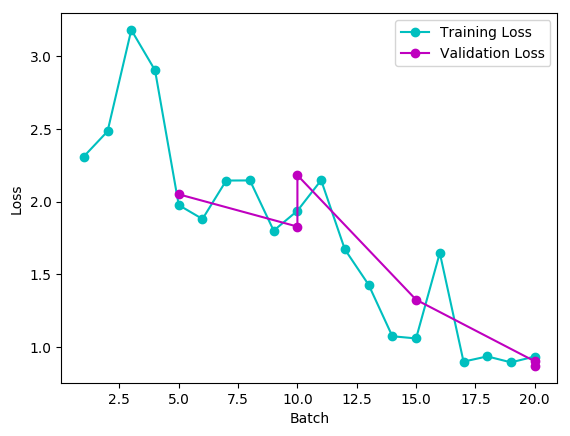

In [72]:
Image(filename='t1/loss1.png')

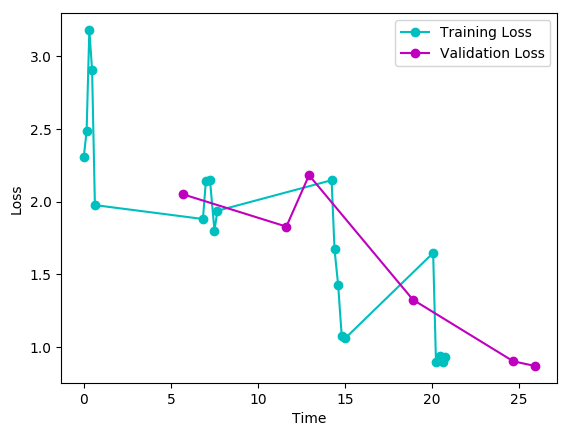

In [27]:
Image(filename='t1/loss2.png')

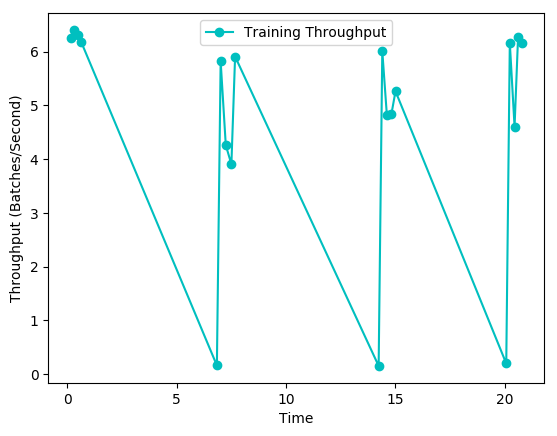

In [28]:
Image(filename='t1/loss3.png')

## What is stored inside mnist-log/ 
- loss_batch: how many batches have ran so far, e.g., if ran 2 epochs, it could be [10, 20], 1st epoch: 10 batches, 2nd epoch: 20 batches
- loss_time: how long has been running so far, [12, 25], 1st epoch took 12 seconds, total 2 epochs took 25 seconds
- loss_labels: loss value for each epoch
- loss_total: same as loss_labels, but not sure in what situation it would be different ??? QUESTION!

**What does summary.yml record? Answered**
- see [detailed answer](https://gitter.im/deepgram-kur/Lobby?at=58bffcf71465c46a56021e7e)

In [29]:
%ls t1/mnist_log/

batch_loss_batch        training_loss_batch     validation_loss_labels
batch_loss_labels       training_loss_labels    validation_loss_time
batch_loss_time         training_loss_time      validation_loss_total
batch_loss_total        training_loss_total
summary.yml             validation_loss_batch


In [69]:
from kur.loggers import BinaryLogger
loss_b = BinaryLogger.load_column('t1/mnist_log/', 'training_loss_batch')
loss_l = BinaryLogger.load_column('t1/mnist_log/', 'training_loss_labels')
loss_ti = BinaryLogger.load_column('t1/mnist_log/', 'training_loss_time')
loss_to = BinaryLogger.load_column('t1/mnist_log/', 'training_loss_total')

In [70]:
type(loss_to)

numpy.ndarray

In [71]:
print("loss_b:", loss_b)
print("loss_l:", loss_l)
print("loss_ti:", loss_ti)
print("loss_to:", loss_to)

loss_b: [10 20]
loss_l: [ 2.27613854  1.26960361]
loss_ti: [ 12.71239853  25.64021492]
loss_to: [ 2.27613854  1.26960361]


## What output_hook produce?
- mnist.results.pkl and valid.output.pkl are the same thing
- result: prediction labels, dim (none, 10)
- truth: true labels, dim (none, 1)
- does kur provide a function to quickly load and see what is stored in the pickle file produced by ouotput hook? QUESTION!

In [88]:
import pickle

In [89]:
objects = []
with (open("mnist_demo/mnist.results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [96]:
objects[0]['result']

{'labels': array([[  6.34934171e-04,   1.61952619e-03,   4.64436976e-04, ...,
           9.67636704e-01,   6.90784678e-03,   9.98236984e-03],
        [  2.50942772e-03,   1.99295226e-02,   3.06665897e-02, ...,
           1.41713594e-04,   4.14029285e-02,   2.23570954e-04],
        [  5.93420700e-04,   9.16382194e-01,   5.09680249e-03, ...,
           9.34527908e-03,   2.21553724e-02,   2.46891868e-03],
        ..., 
        [  3.83175304e-03,   1.99483801e-02,   9.33283358e-04, ...,
           1.60496131e-01,   2.52854586e-01,   1.92379564e-01],
        [  4.16923352e-02,   4.19610478e-02,   4.21239715e-03, ...,
           3.33479494e-02,   3.46194357e-01,   4.40075547e-02],
        [  1.28660694e-01,   1.02628364e-04,   3.26921465e-04, ...,
           3.14452591e-05,   9.28878610e-04,   5.14979765e-04]], dtype=float32)}

In [98]:
objects[0]['truth']

{'labels': array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])}

In [99]:
len(objects[0]['result']['labels'])

10000